<a href="https://colab.research.google.com/github/Alton1998/Tensorflow-tutorial-2.0/blob/main/ANN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("cancer_classification.csv")

In [5]:
df.info

<bound method DataFrame.info of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean con

In [6]:
X = df.drop('benign_0__mal_1',axis=1).values
y= df['benign_0__mal_1'].values

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=45
)

In [9]:
from sklearn.preprocessing import MinMaxScaler


In [10]:
scaler = MinMaxScaler()

In [11]:
X_train = scaler.fit_transform(X_train)

In [12]:
X_test = scaler.transform(X_test)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [14]:

model = Sequential()


In [15]:
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy')

In [16]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128,epochs=400)

Epoch 1/400
3/3 [==============================] - 1s 108ms/step - loss: 0.6928 - val_loss: 0.6820
Epoch 2/400
3/3 [==============================] - 0s 16ms/step - loss: 0.6815 - val_loss: 0.6721
Epoch 3/400
3/3 [==============================] - 0s 25ms/step - loss: 0.6721 - val_loss: 0.6627
Epoch 4/400
3/3 [==============================] - 0s 27ms/step - loss: 0.6620 - val_loss: 0.6530
Epoch 5/400
3/3 [==============================] - 0s 25ms/step - loss: 0.6525 - val_loss: 0.6429
Epoch 6/400
3/3 [==============================] - 0s 25ms/step - loss: 0.6422 - val_loss: 0.6321
Epoch 7/400
3/3 [==============================] - 0s 26ms/step - loss: 0.6325 - val_loss: 0.6209
Epoch 8/400
3/3 [==============================] - 0s 17ms/step - loss: 0.6221 - val_loss: 0.6095
Epoch 9/400
3/3 [==============================] - 0s 18ms/step - loss: 0.6114 - val_loss: 0.5976
Epoch 10/400
3/3 [==============================] - 0s 17ms/step - loss: 0.6002 - val_loss: 0.5848
Epoch 11/400
3/3 [

In [17]:
losses = pd.DataFrame(model.history.history)

<Axes: >

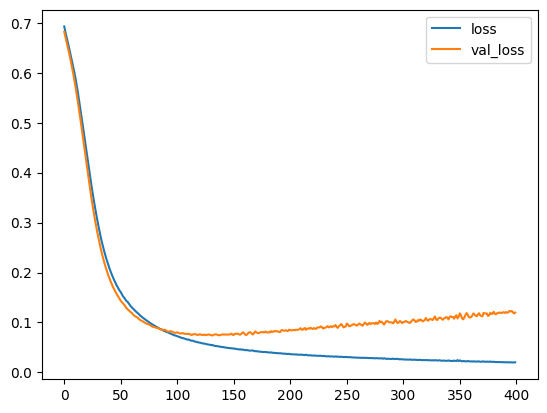

In [18]:
losses.plot()

In [19]:

model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy')


In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [22]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
12/12 [==============================] - 1s 20ms/step - loss: 0.6826 - val_loss: 0.6560
Epoch 2/600
12/12 [==============================] - 0s 6ms/step - loss: 0.6448 - val_loss: 0.6255
Epoch 3/600
12/12 [==============================] - 0s 5ms/step - loss: 0.6098 - val_loss: 0.5856
Epoch 4/600
12/12 [==============================] - 0s 6ms/step - loss: 0.5720 - val_loss: 0.5477
Epoch 5/600
12/12 [==============================] - 0s 6ms/step - loss: 0.5339 - val_loss: 0.5096
Epoch 6/600
12/12 [==============================] - 0s 5ms/step - loss: 0.4962 - val_loss: 0.4695
Epoch 7/600
12/12 [==============================] - 0s 6ms/step - loss: 0.4576 - val_loss: 0.4303
Epoch 8/600
12/12 [==============================] - 0s 6ms/step - loss: 0.4198 - val_loss: 0.3929
Epoch 9/600
12/12 [==============================] - 0s 5ms/step - loss: 0.3833 - val_loss: 0.3562
Epoch 10/600
12/12 [==============================] - 0s 6ms/step - loss: 0.3500 - val_loss: 0.3231
Epoch 11

In [23]:
losses = pd.DataFrame(model.history.history)

<Axes: >

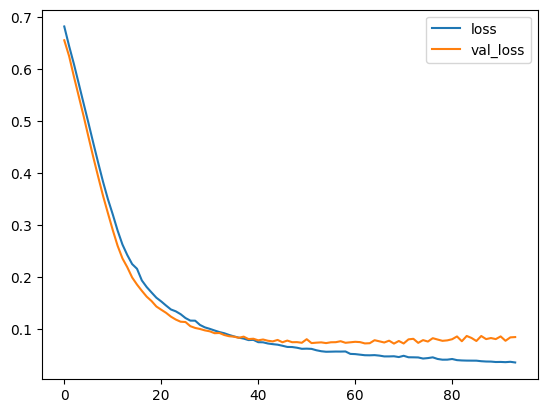

In [24]:
losses.plot()

In [26]:
from tensorflow.keras.layers import Dropout

In [28]:

model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy')


In [29]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
12/12 [==============================] - 1s 17ms/step - loss: 0.6984 - val_loss: 0.6799
Epoch 2/600
12/12 [==============================] - 0s 5ms/step - loss: 0.6965 - val_loss: 0.6644
Epoch 3/600
12/12 [==============================] - 0s 7ms/step - loss: 0.6736 - val_loss: 0.6521
Epoch 4/600
12/12 [==============================] - 0s 5ms/step - loss: 0.6664 - val_loss: 0.6407
Epoch 5/600
12/12 [==============================] - 0s 5ms/step - loss: 0.6499 - val_loss: 0.6243
Epoch 6/600
12/12 [==============================] - 0s 6ms/step - loss: 0.6310 - val_loss: 0.6029
Epoch 7/600
12/12 [==============================] - 0s 6ms/step - loss: 0.6172 - val_loss: 0.5819
Epoch 8/600
12/12 [==============================] - 0s 5ms/step - loss: 0.5977 - val_loss: 0.5601
Epoch 9/600
12/12 [==============================] - 0s 6ms/step - loss: 0.5855 - val_loss: 0.5324
Epoch 10/600
12/12 [==============================] - 0s 6ms/step - loss: 0.5531 - val_loss: 0.5063
Epoch 11

In [30]:
losses = pd.DataFrame(model.history.history)

<Axes: >

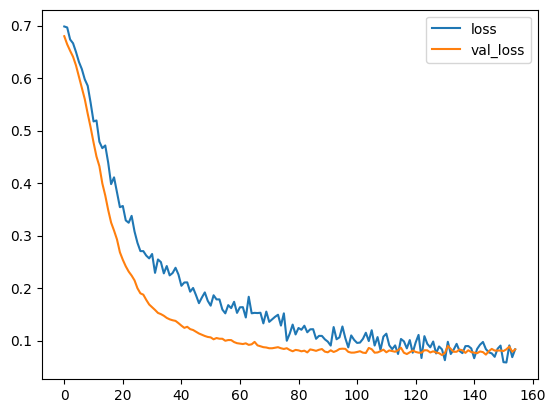

In [31]:
losses.plot()